<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

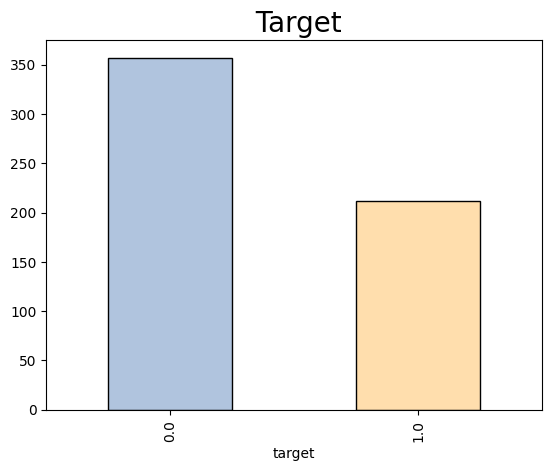

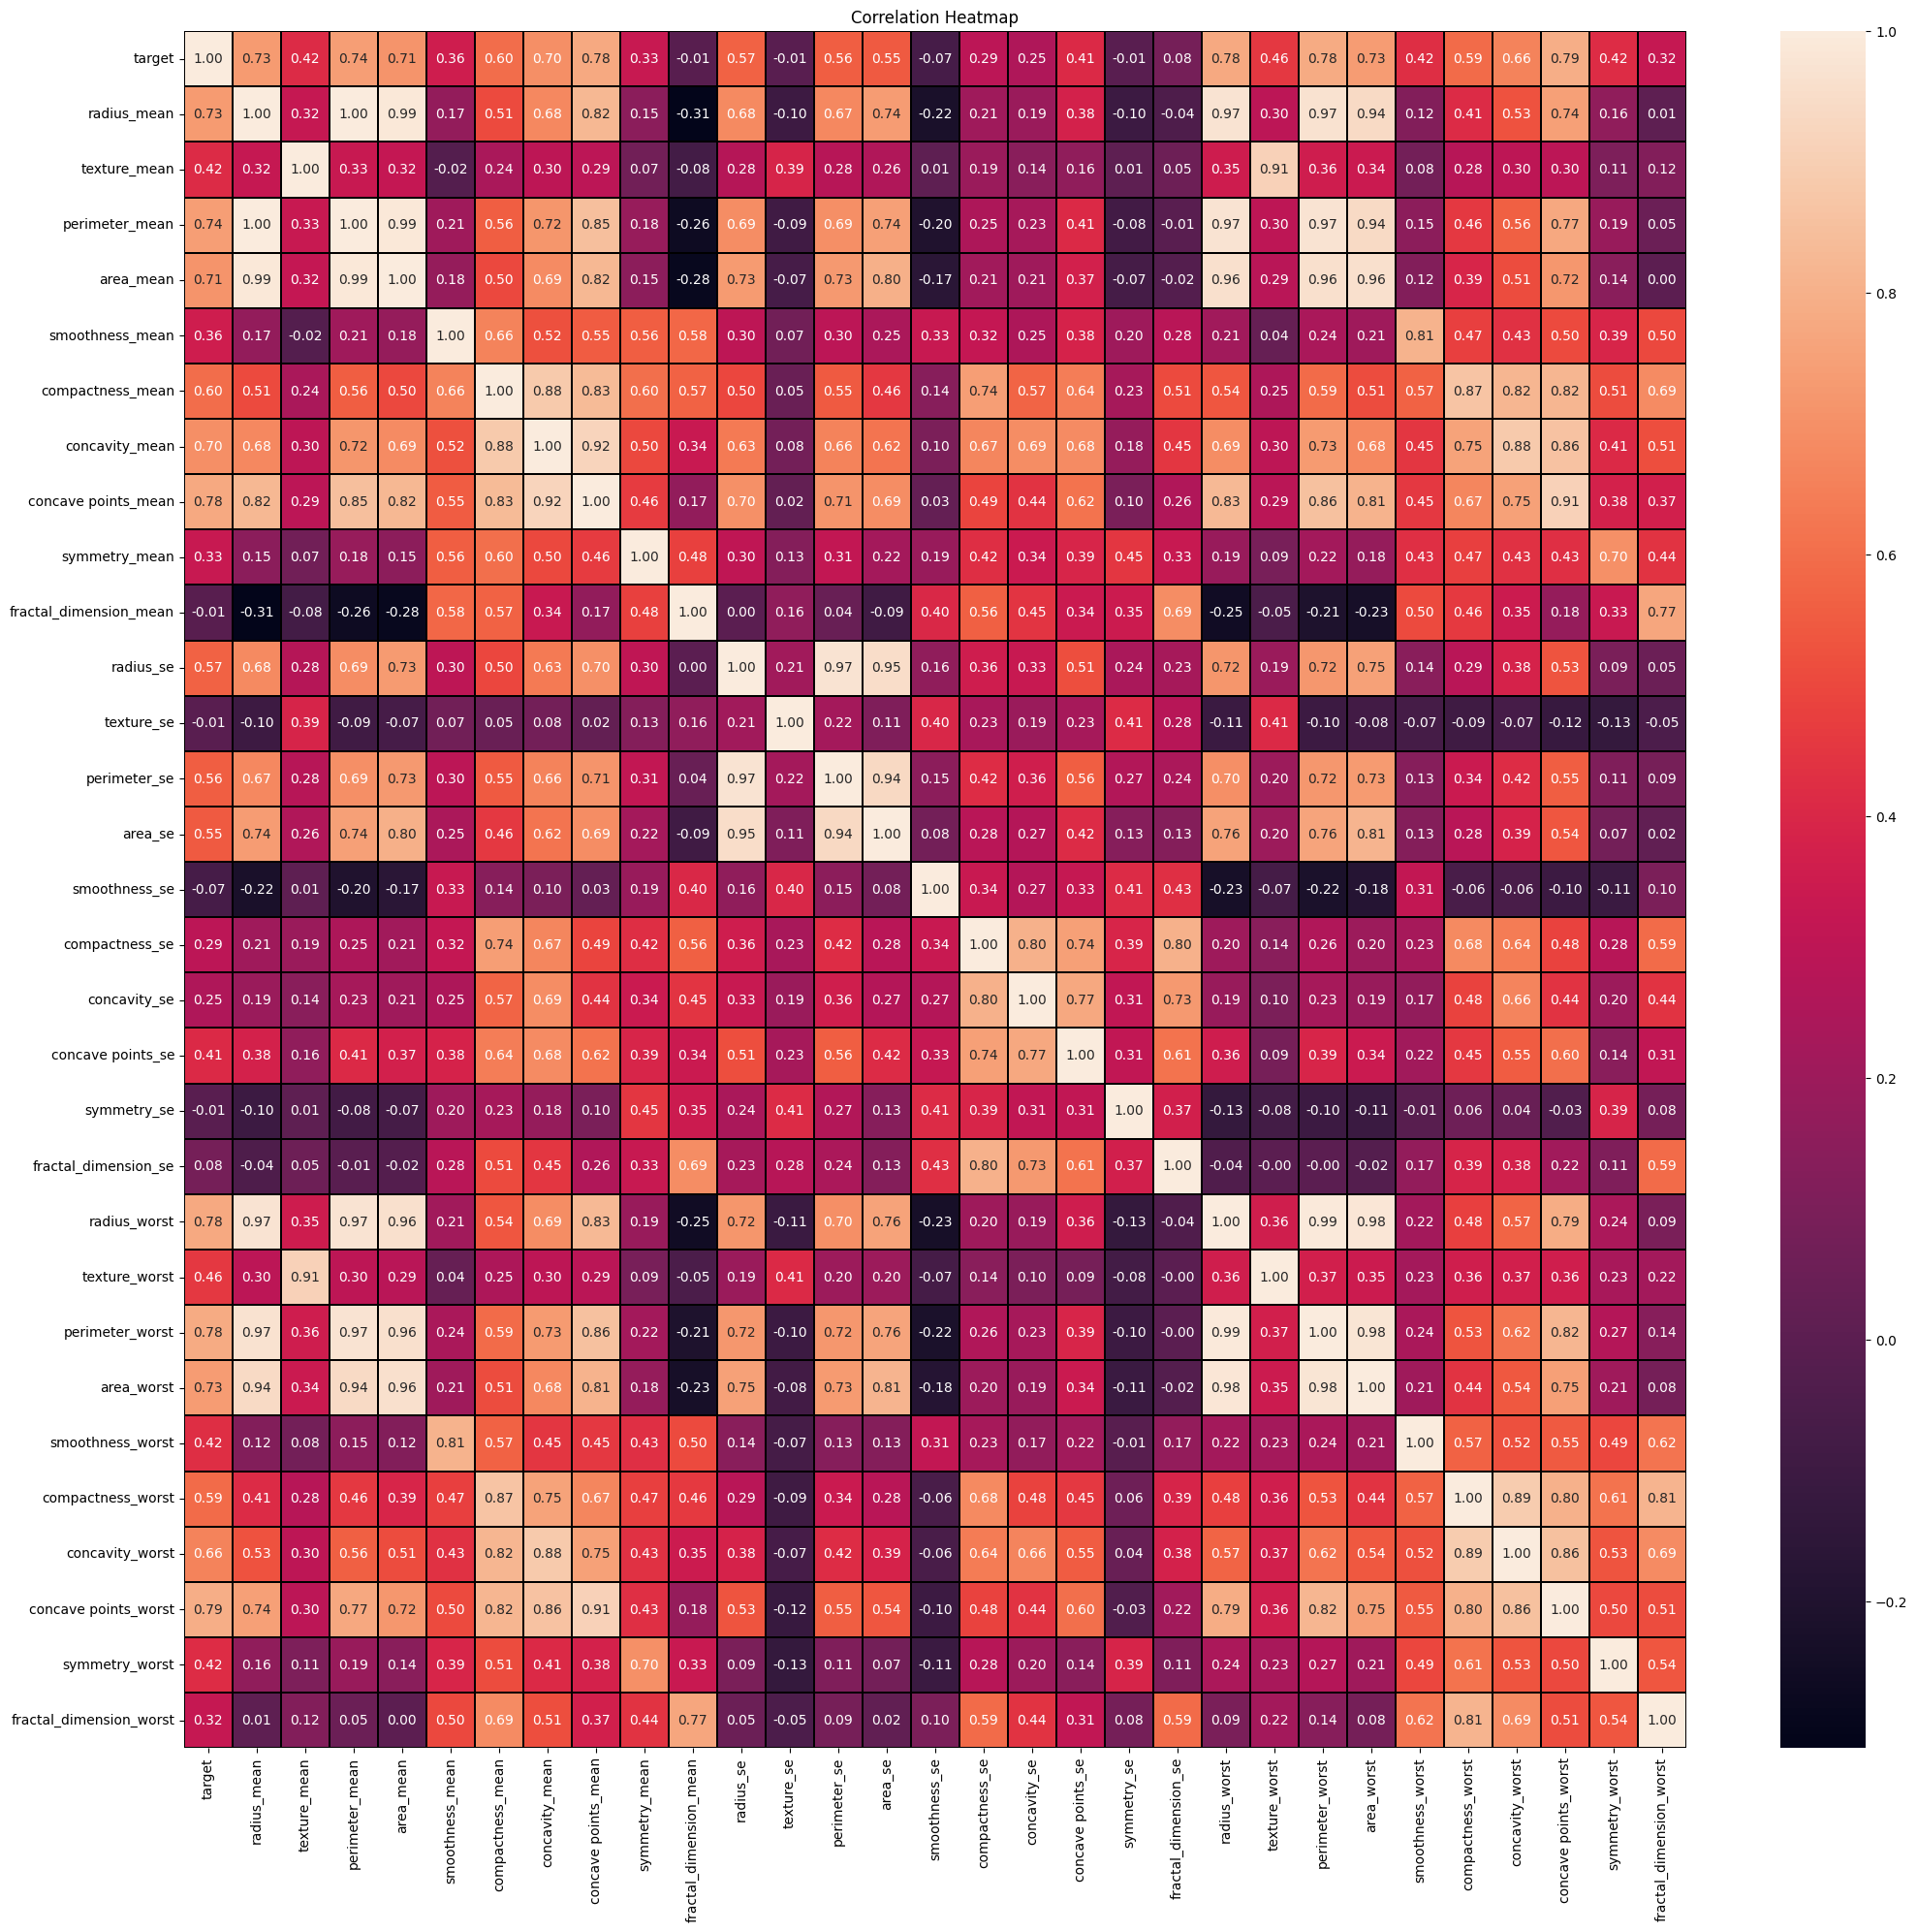

<Figure size 1000x800 with 0 Axes>

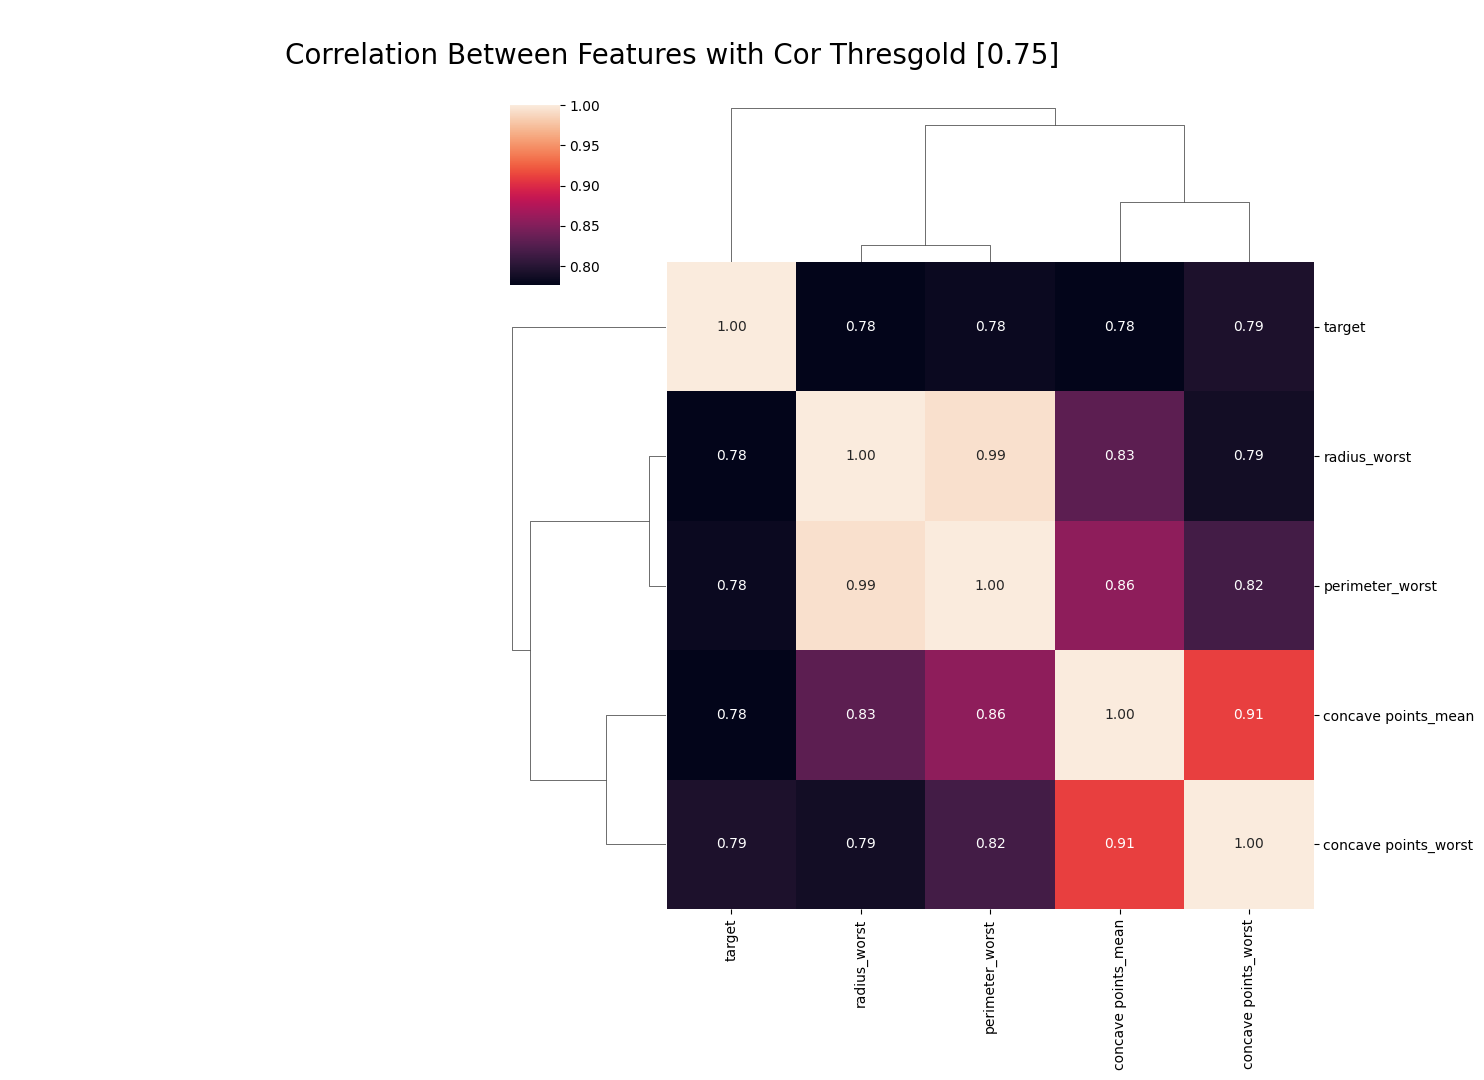

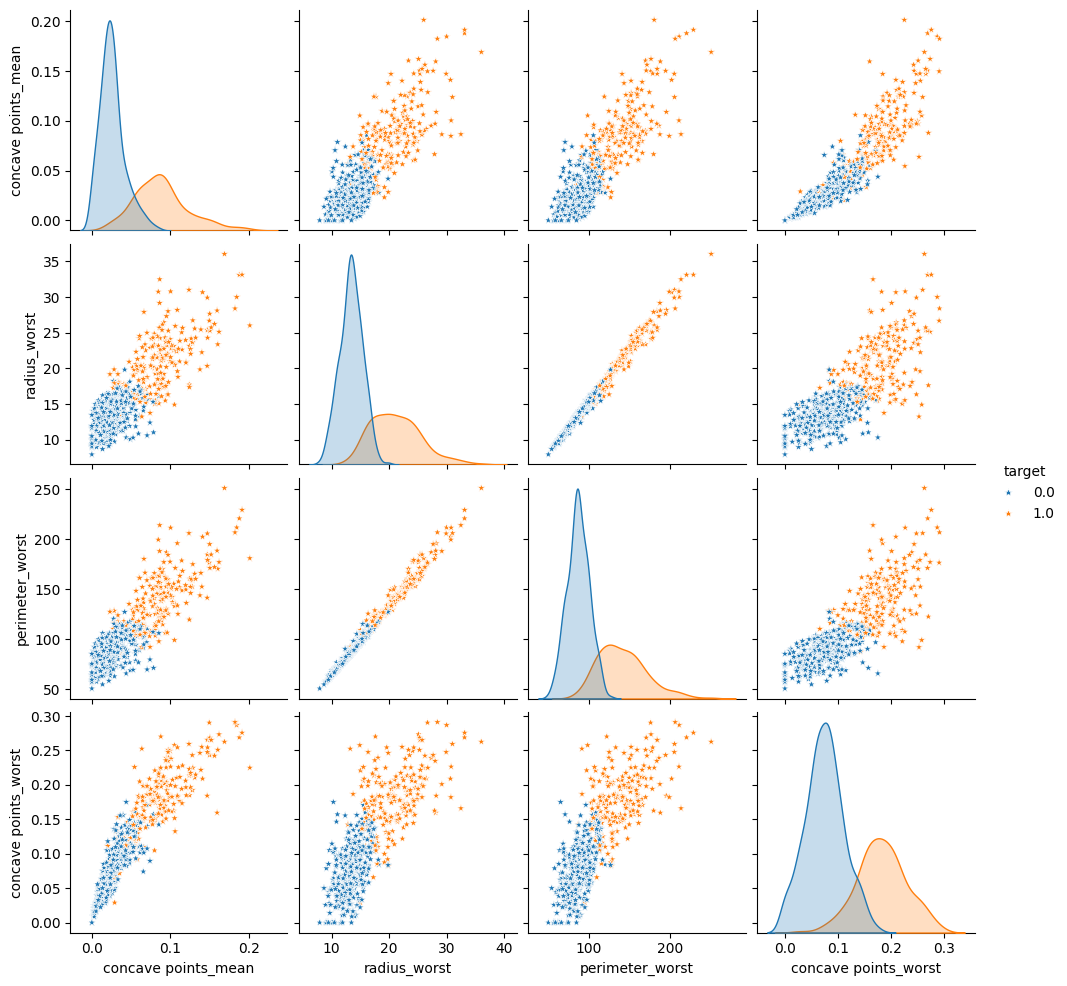

KNN
confusion matrix


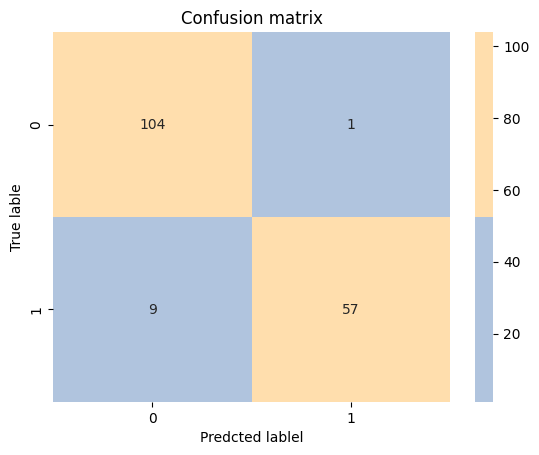

Normalized confusion matrix


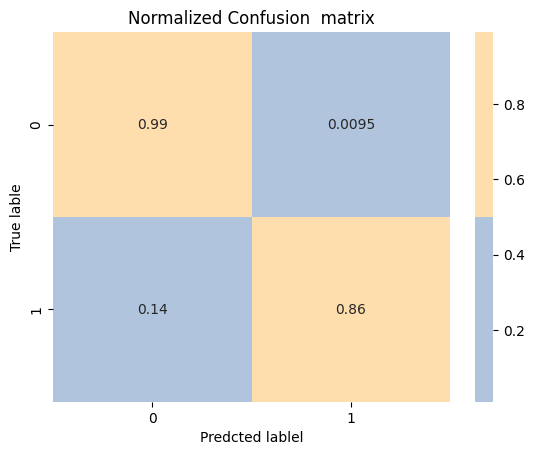

[[104   1]
 [  9  57]]
              precision    recall  f1-score   support

         0.0       0.92      0.99      0.95       105
         1.0       0.98      0.86      0.92        66

    accuracy                           0.94       171
   macro avg       0.95      0.93      0.94       171
weighted avg       0.94      0.94      0.94       171

accuracy_score :  0.9415204678362573
Random Forest
confusion matrix


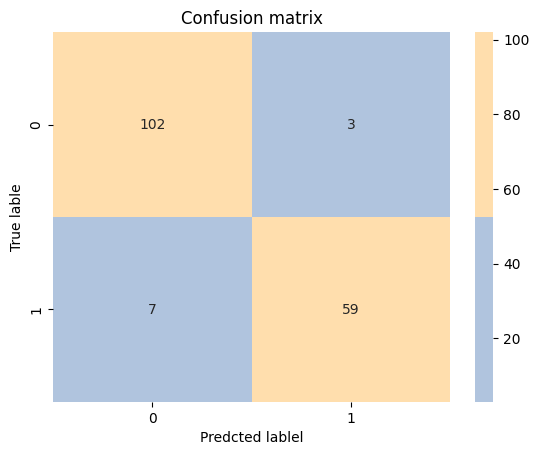

Normalized confusion matrix


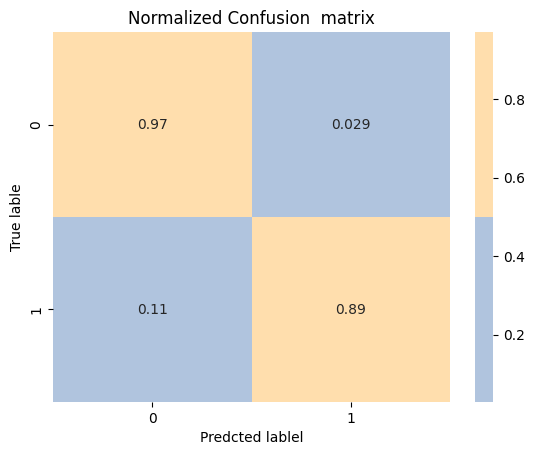

[[102   3]
 [  7  59]]
              precision    recall  f1-score   support

         0.0       0.94      0.97      0.95       105
         1.0       0.95      0.89      0.92        66

    accuracy                           0.94       171
   macro avg       0.94      0.93      0.94       171
weighted avg       0.94      0.94      0.94       171

accuracy_score :  0.9415204678362573
DecisionTree
confusion matrix


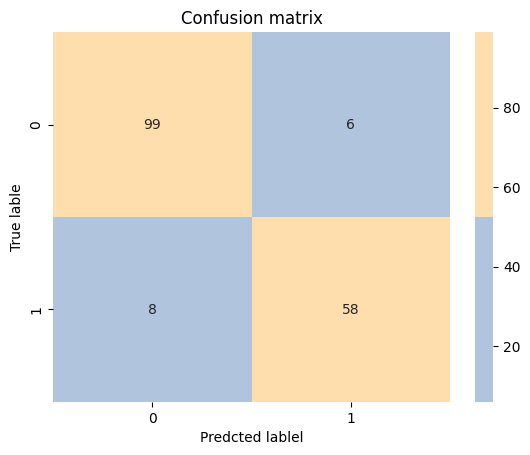

Normalized confusion matrix


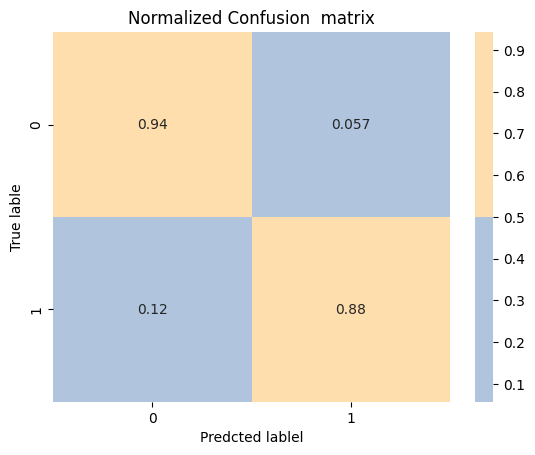

[[99  6]
 [ 8 58]]
              precision    recall  f1-score   support

         0.0       0.93      0.94      0.93       105
         1.0       0.91      0.88      0.89        66

    accuracy                           0.92       171
   macro avg       0.92      0.91      0.91       171
weighted avg       0.92      0.92      0.92       171

accuracy_score :  0.9181286549707602
Naive_bayes
confusion matrix


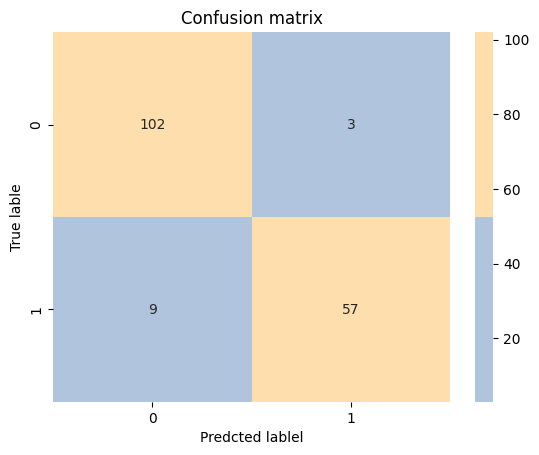

Normalized confusion matrix


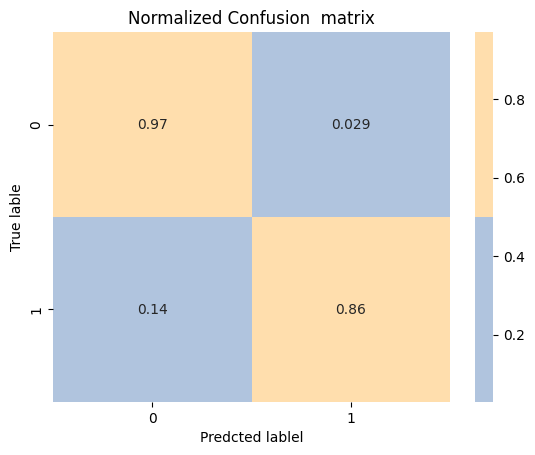

[[102   3]
 [  9  57]]
              precision    recall  f1-score   support

         0.0       0.92      0.97      0.94       105
         1.0       0.95      0.86      0.90        66

    accuracy                           0.93       171
   macro avg       0.93      0.92      0.92       171
weighted avg       0.93      0.93      0.93       171

accuracy_score :  0.9298245614035088
Logistic Regression
confusion matrix


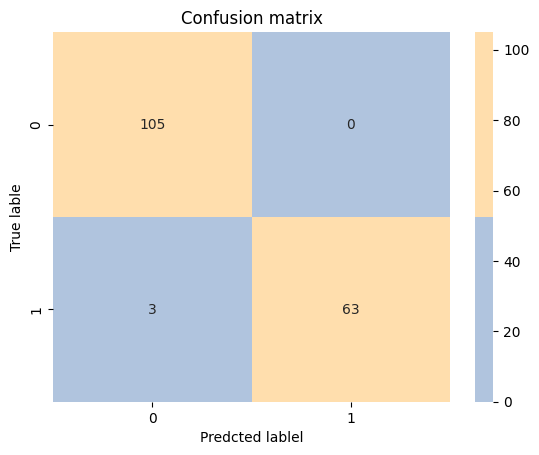

Normalized confusion matrix


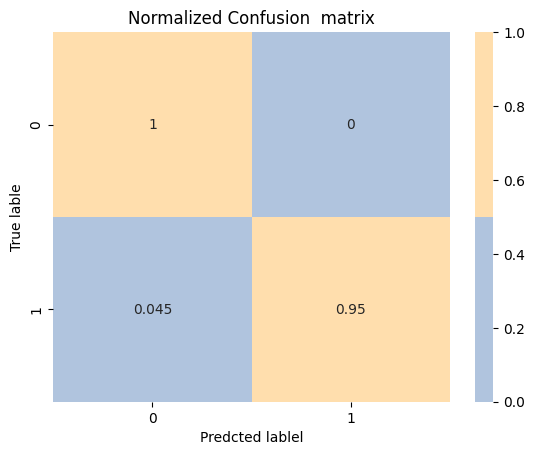

[[105   0]
 [  3  63]]
              precision    recall  f1-score   support

         0.0       0.97      1.00      0.99       105
         1.0       1.00      0.95      0.98        66

    accuracy                           0.98       171
   macro avg       0.99      0.98      0.98       171
weighted avg       0.98      0.98      0.98       171

accuracy_score :  0.9824561403508771


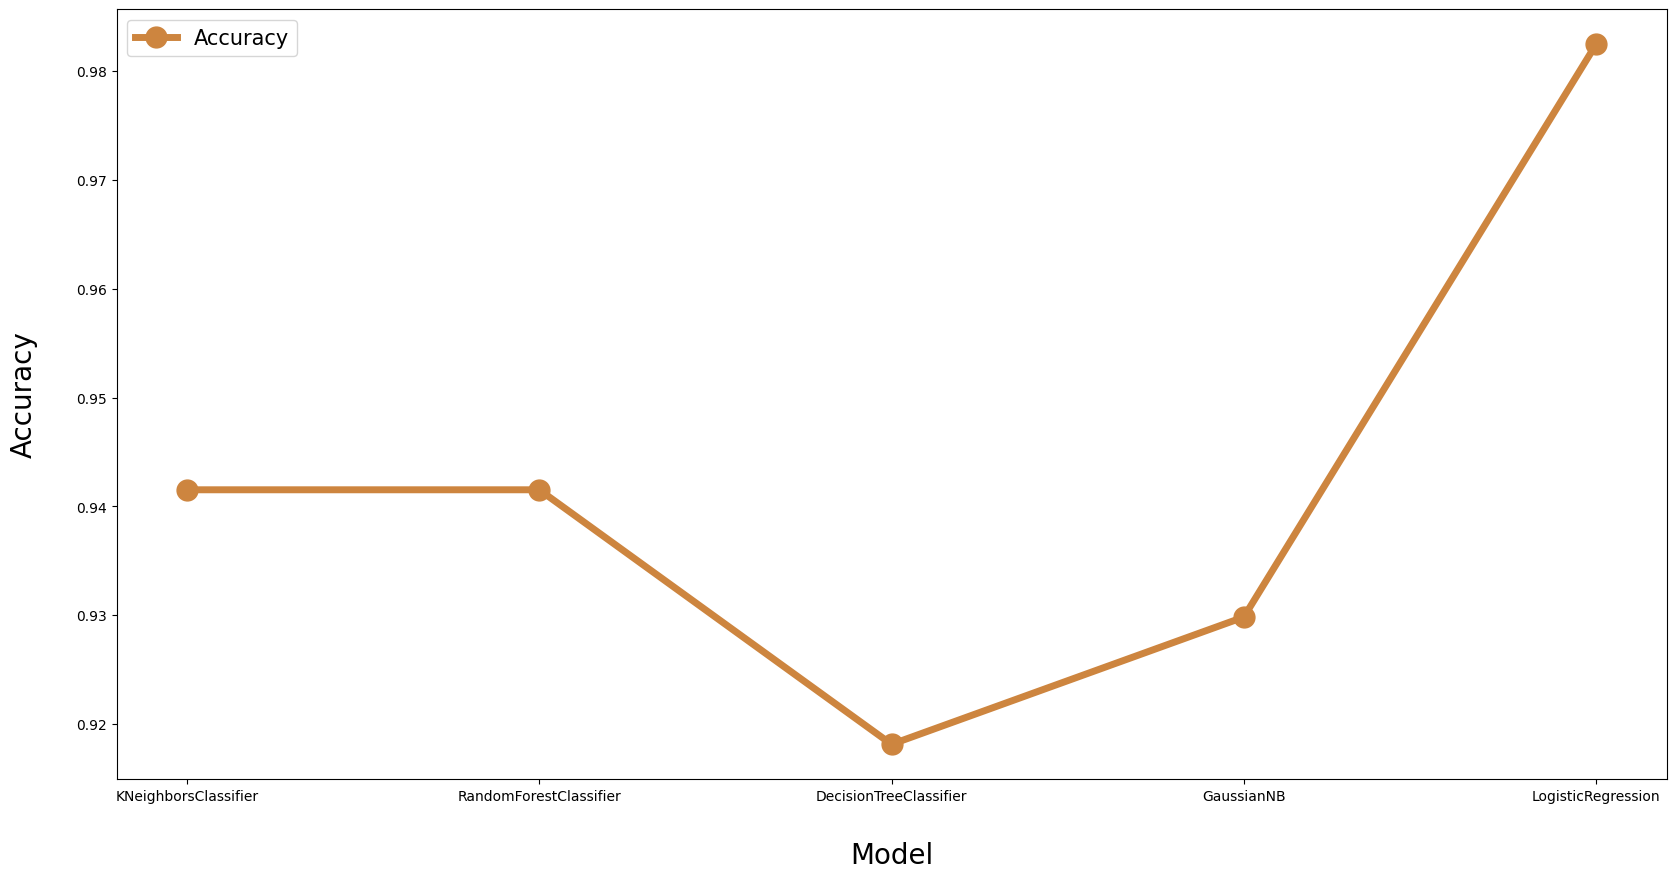

In [2]:
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB

from sklearn.metrics import classification_report, accuracy_score
from sklearn.metrics import confusion_matrix


data = pd.read_csv("C:\\Users\\a205\\OneDrive - DXC Production\\Desktop\\AI\\data.csv")

data.head()

data.shape
data.info()

# Check Duplication
data.duplicated().sum()

# check Missing value
data.isna().sum()

# Check the number of unique values of each column
data.nunique()

#Dropping the id and Unnamed: 32 columns which will not provide any information for our model
data = data.drop(['id','Unnamed: 32'], axis= 1)

#Changed the name of the diagnostic column to target!
data = data.rename(columns={'diagnosis' : 'target'})

#changed taget data in the dataset. I changed malignant to 1 and benign to 0.
data.target.replace({'M' : '1','B': '0'},inplace=True)

# Converting target type to int64
data.target = data.target.astype('float64')

data.head()


data.tail()

data.info()

# Check statistic of dataset
data.describe().T

# Look at how many benign and malignant yields there are.
data.target.value_counts()


# visualized target data in the dataset.
data['target'].value_counts().plot(kind='bar',edgecolor='black',color=['lightsteelblue','navajowhite'])
plt.title(" Target",fontsize=20)
plt.show()

# Correlation Analysis
cor = data.corr()
cor


plt.figure(figsize=(25,23))
sns.heatmap(cor, annot= True, linewidths= 0.3 ,linecolor = "black", fmt = ".2f")
plt.title('Correlation Heatmap')
plt.show()

#Data with a correlation greater than 0.75.
threshold = 0.75
filtre = np.abs(cor["target"] > threshold)
corr_features = cor.columns[filtre].tolist()
plt.figure(figsize=(10,8))
sns.clustermap(data[corr_features].corr(), annot = True, fmt = ".2f")
plt.title("\n                               Correlation Between Features with Cor Thresgold [0.75]\n",fontsize=20)
plt.show()


#visualized the data with a correlation greater than 0.75
sns.pairplot(data[corr_features], diag_kind = "kde" , markers = "*", hue="target")
plt.show()


# Splitting data
x= data.drop('target',axis=1)
y= data['target']

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.30,random_state=101)

s= StandardScaler()
x_train = s.fit_transform(x_train)
x_test = s.fit_transform(x_test)


algorithm = ['KNeighborsClassifier','RandomForestClassifier','DecisionTreeClassifier','GaussianNB','LogisticRegression']
Accuracy=[]

def all(model):
    model.fit(x_train,y_train)
    pred = model.predict(x_test)

    acc=accuracy_score(y_test,pred) 
    Accuracy.append(acc)

    # confusion matrix without Normalization
    print('confusion matrix')
    # Calculate confusion matrix
    cm = confusion_matrix(y_test,pred)
    # Plot the confusion matrix
    sns.heatmap(cm, annot=True, fmt='d',cmap=['lightsteelblue','navajowhite'])
    plt.title('Confusion matrix')
    plt.xlabel('Predcted lablel')
    plt.ylabel('True lable')
    plt.show()

    # confusion matrix without Normalization
    print('Normalized confusion matrix')
    # Calculate confusion matrix
    cm1 = confusion_matrix(y_test,pred, normalize='true')
    # Plot the confusion matrix
    sns.heatmap(cm1, annot=True,cmap=['lightsteelblue','navajowhite'])
    plt.title('Normalized Confusion  matrix')
    plt.xlabel('Predcted lablel')
    plt.ylabel('True lable')
    plt.show()

    # print Confusion matrix, Classification report and accuracy report
    print(cm)
    print(classification_report(y_test,pred))
    print('accuracy_score : ' , acc)


#KNN Algorithm 
print("KNN")
model_1 =KNeighborsClassifier(n_neighbors=2)
all(model_1) 


#Random Forest
print("Random Forest")
model_2= RandomForestClassifier(n_estimators=100,random_state=0)
all(model_2)


#DecisionTree
print("DecisionTree")
model_3 = DecisionTreeClassifier(random_state=42)
all(model_3)

#Naive_bayes
print("Naive_bayes")
model_4 = GaussianNB()
all(model_4)


#Logistic Regression
print("Logistic Regression")
model_5 = LogisticRegression()
all(model_5)


df = pd.DataFrame({'Algorithm':algorithm,'Accuracy':Accuracy })
df

fig = plt.figure(figsize=(20,10))
plt.plot(df.Algorithm,df.Accuracy,label='Accuracy',lw=5,color='peru',marker='o',markersize = 15)
plt.legend(fontsize=15)
plt.xlabel('\nModel',fontsize= 20)
plt.ylabel('Accuracy\n',fontsize= 20)
plt.show()